<a href="https://colab.research.google.com/github/mojeda805/devtraining-needit-utah/blob/master/Malaria_Detection_Project(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/capstone/Capstone/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
image_shape = train_images.shape[1:]

image_shape

(64, 64, 3)

###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
train_labels.shape

(24958,)

In [ ]:
test_labels.shape

(2600,)

####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print('Min Dimensions:           {}'.format(np.min(train_images)))
print('Max Dimensions:           {}'.format(np.max(test_images)))
print('Max Dimensions:           {}'.format(np.max(train_images)))
print('Min Dimensions:           {}'.format(np.min(test_images)))

Min Dimensions:           0
Max Dimensions:           255
Max Dimensions:           255
Min Dimensions:           0


####<b> Observations and insights: _____

1.   Images are greyscale and need to be divided by 255 to normalize them






###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values
pd.Series(train_labels).value_counts()


,count
1,12582
0,12376


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')




####<b> Observations and insights: _____train and tes images were grayscale and we normalized them to the range [0,255] to [0.0,1.0]

In [ ]:
print(train_images[0].shape)

(64, 64, 3)


###<b> Plot to check if the data is balanced

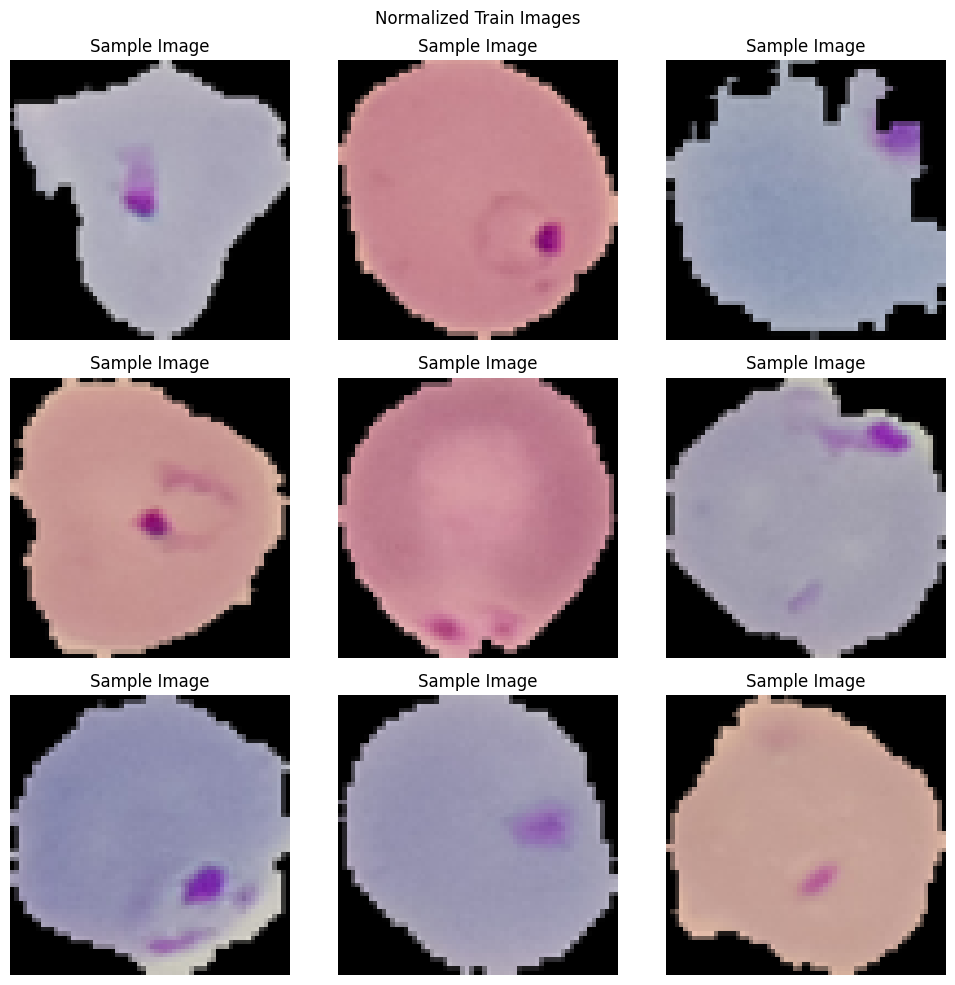

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

import matplotlib.pyplot as plt

# Plot 9 images from the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title("Sample Image")
    plt.axis('off')
plt.suptitle("Normalized Train Images")
plt.tight_layout()
plt.show()

####<b> Observations and insights: _____Purple/Dark Regions (Parasite Presence)

In several images (top left, top right, bottom left), we see distinct purple/dark-stained spots — these likely indicate the presence of Plasmodium parasites.

This pigmentation is usually what models learn to associate with the "Parasitized" class.

Pale/Reddish Cells (Uninfected Cells)

Some cells (like middle images) look smoother, more uniform, and without dark regions — possibly "Uninfected".

The red/pink hue is due to the normalization preserving relative RGB ratios from stained slides.

Cell Shape Variations

Some cells appear distorted or irregular (top left, bottom left), while others are nearly circular (middle images).

Parasitized cells can have deformed or ruptured appearances, which may help classification

### <b>Data Exploration</b>
Let's visualize the images from the train data

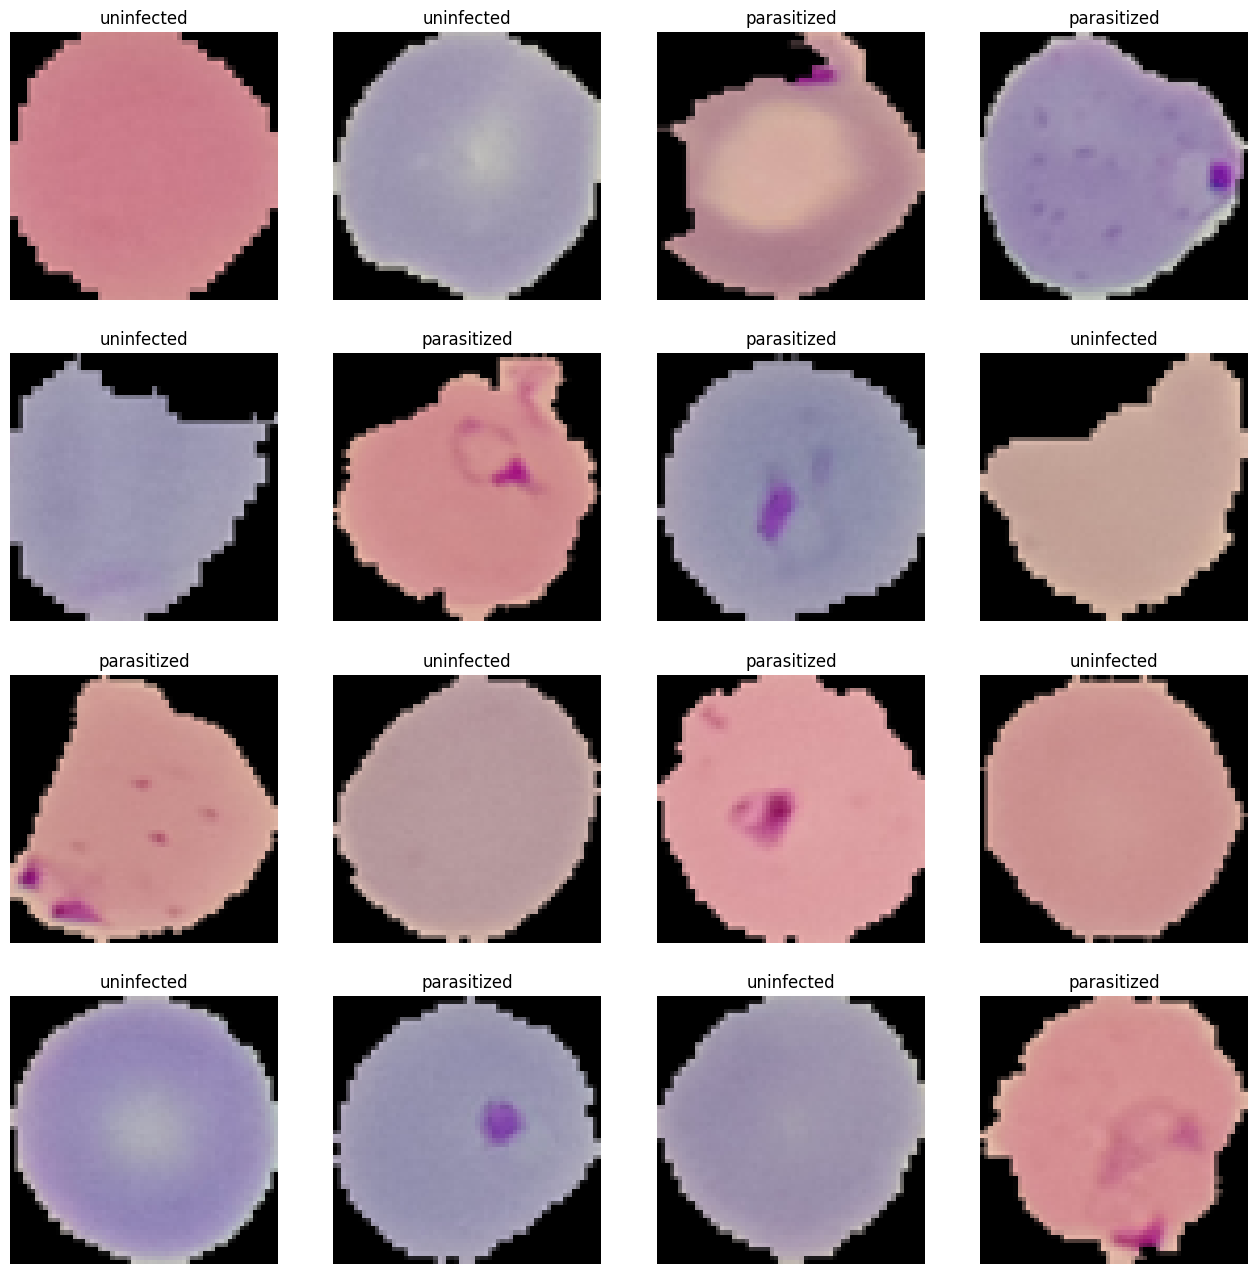

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: _____

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

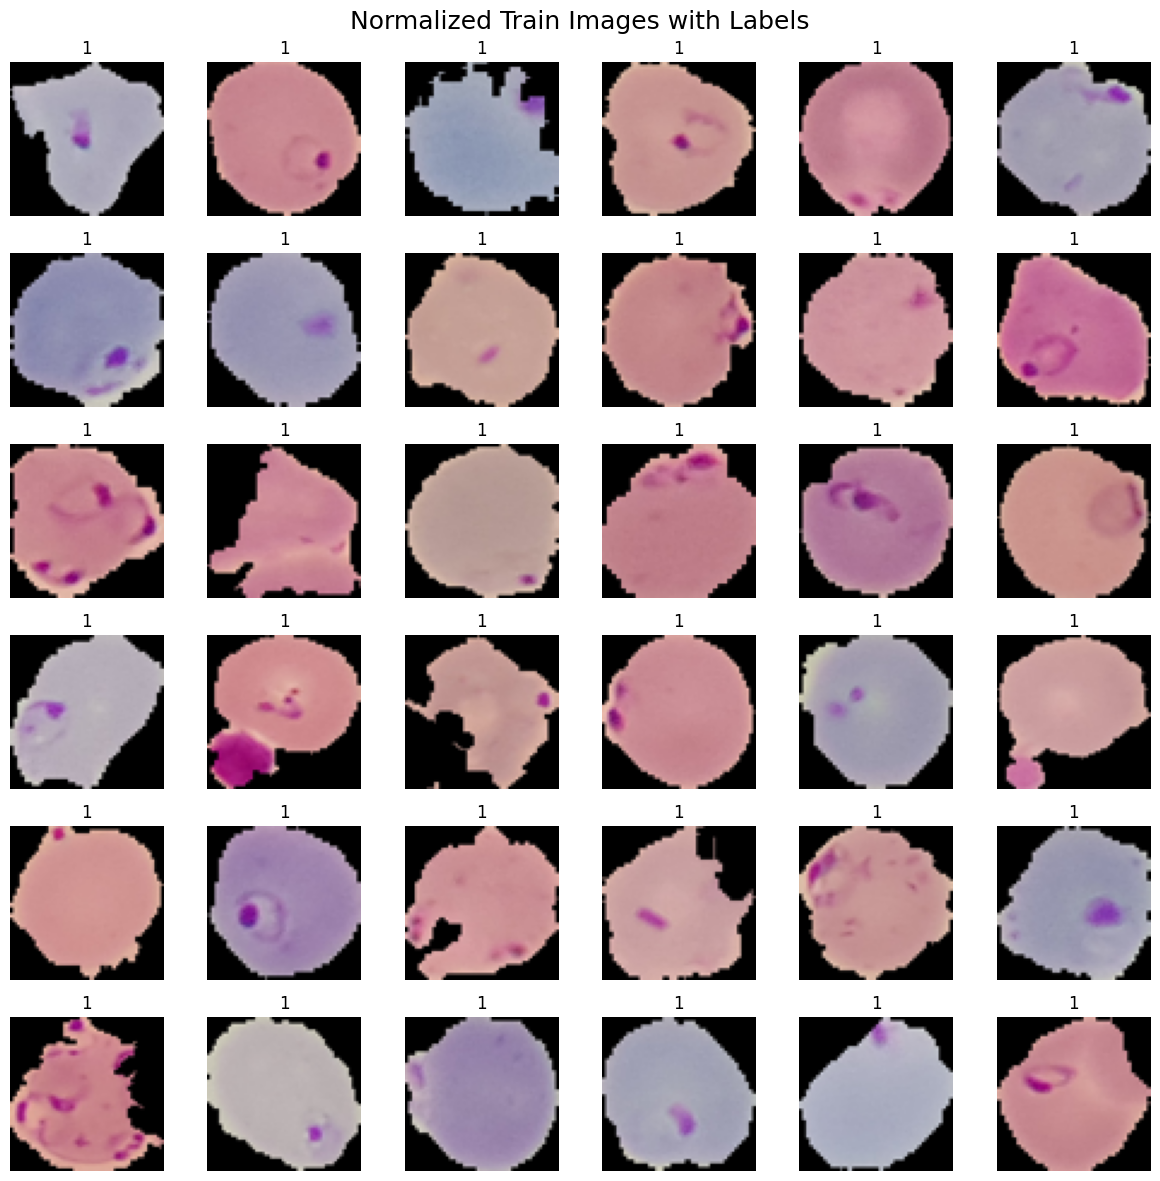

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(train_images[i])  # image already normalized
    plt.title(train_labels[i])   # show label
    plt.axis('off')

plt.suptitle("Normalized Train Images with Labels", fontsize=18)
plt.tight_layout()
plt.show()


####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

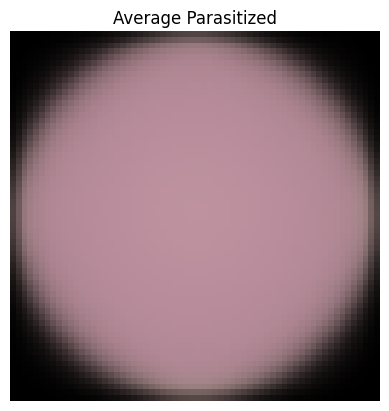

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

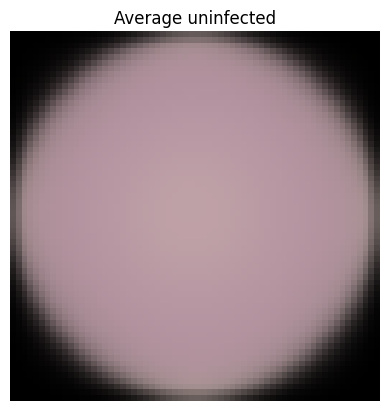

In [ ]:
# Similarly write the code to find the mean image of uninfected

uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')



In [ ]:
print(train_labels[:10])
print(set(train_labels))

[1 1 1 1 1 1 1 1 1 1]
{np.int64(0), np.int64(1)}


####<b> Observations and insights: _____

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

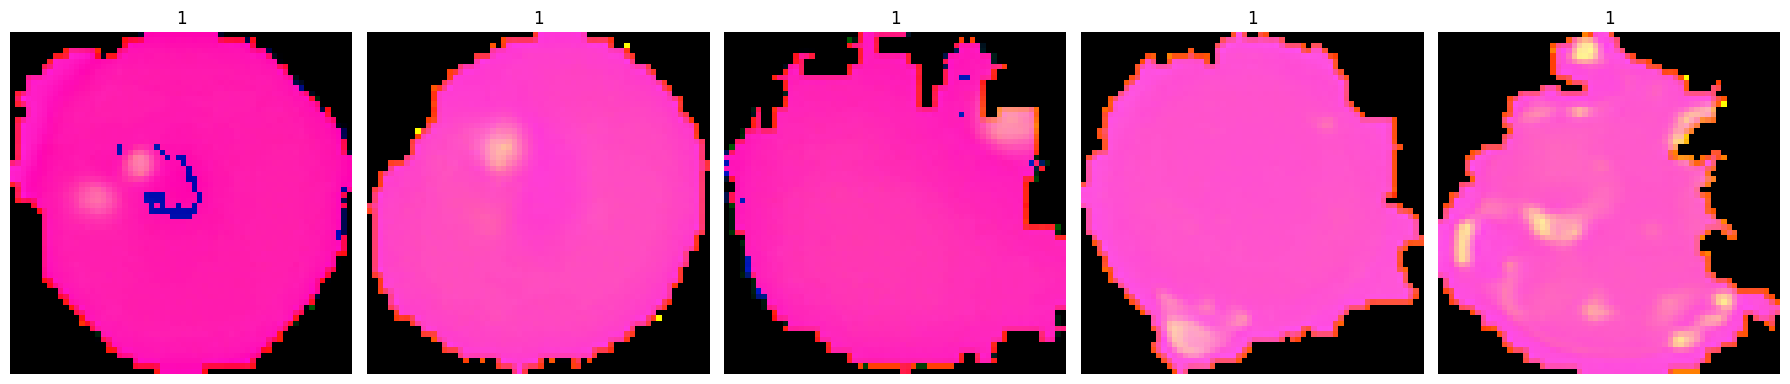

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

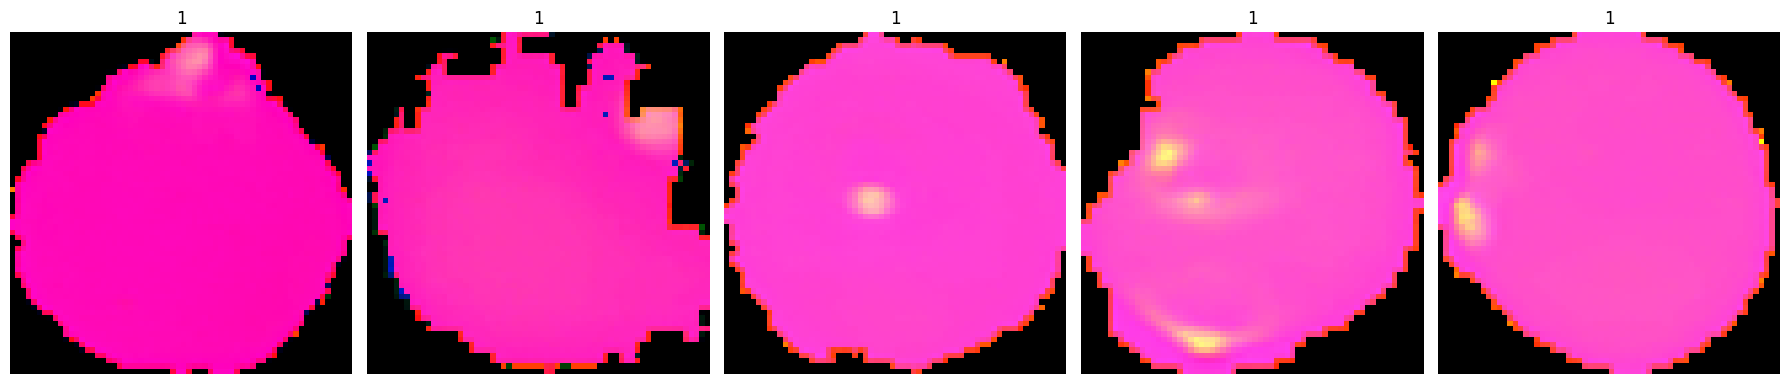

In [ ]:
# Similarly you can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations and insights: _____

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

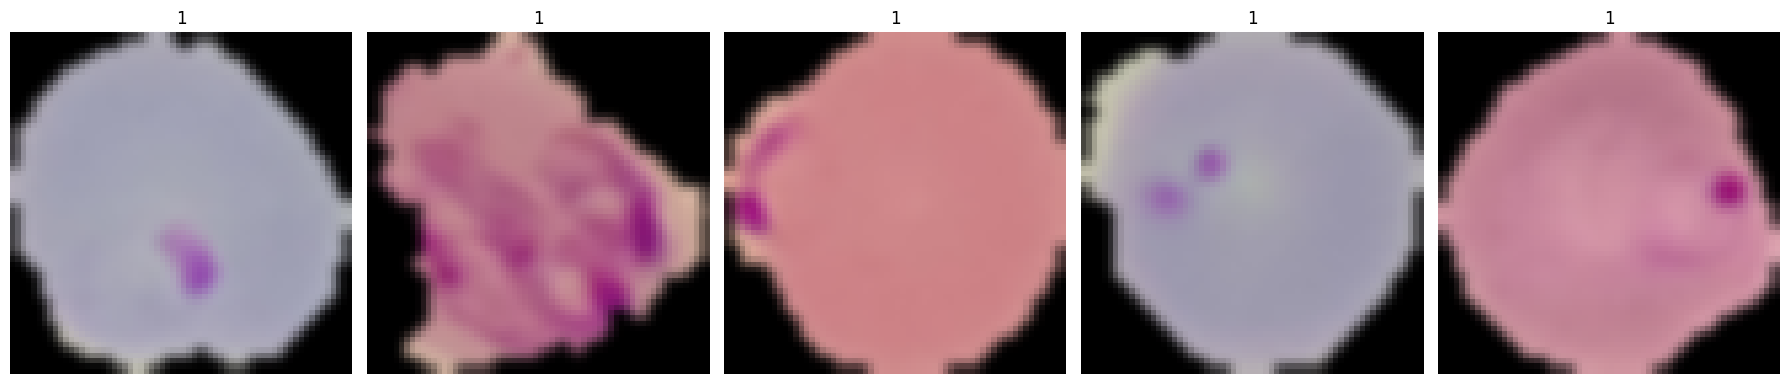

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

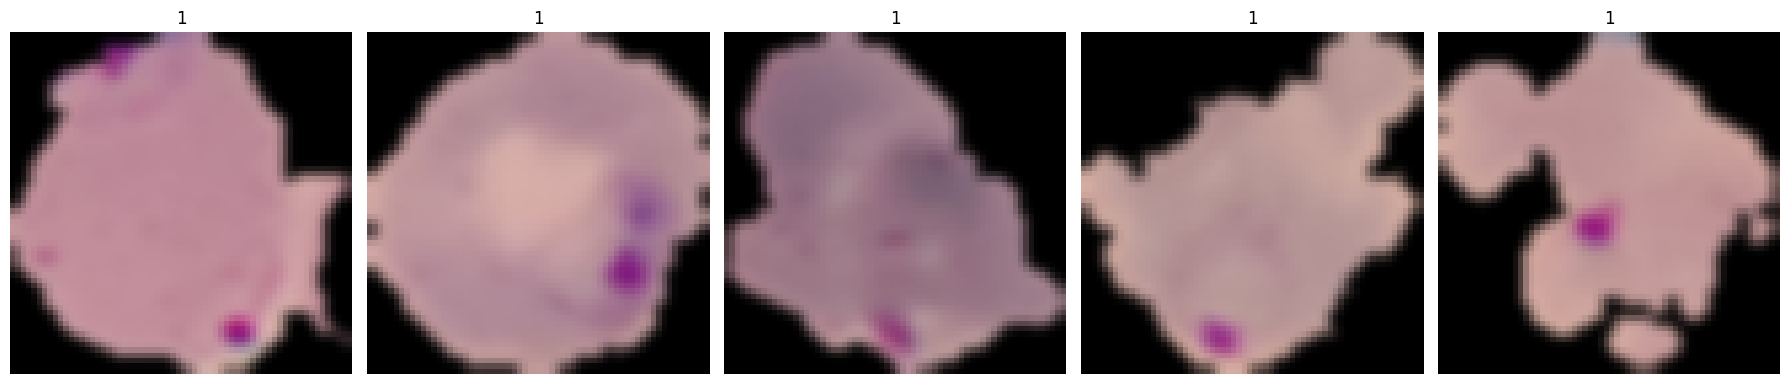

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?
Blurring helps for data augmentation to introduce slight variations so the model generilizes better, for noise reduction blurring can help smooth them , for feature robustness to evaluate how sensitive the model is to small changes. In this case it did not help because, parasite edges are not clearly visible.

###<B>One Hot Encoding on the train and test labels

In [ ]:
import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Import to_categorical here so it's available when needed
from tensorflow.keras.utils import to_categorical

# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
import tensorflow as tf
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,786 (4.04 MB)

 Trainable params: 1,058,786 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 98s 154ms/step - accuracy: 0.7272 - loss: 0.5346 - val_accuracy: 0.9523 - val_loss: 0.1739
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 143s 155ms/step - accuracy: 0.9452 - loss: 0.1379 - val_accuracy: 0.9730 - val_loss: 0.0967
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 134s 143ms/step - accuracy: 0.9631 - loss: 0.1161 - val_accuracy: 0.9585 - val_loss: 0.1589
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 94s 150ms/step - accuracy: 0.9717 - loss: 0.0940 - val_accuracy: 0.9834 - val_loss: 0.0733
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 137s 143ms/step - accuracy: 0.9736 - loss: 0.0766 - val_accuracy: 0.9852 - val_loss: 0.0578
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.9769 - loss: 0.0689 - val_accuracy: 0.9776 - val_loss: 0.0805
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 141s 143ms/step - accuracy: 0.9787 - loss: 0.0651 - val_accuracy: 0.9816 - val_loss: 0.0724


###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9830 - loss: 0.0686

 Test_Accuracy:- 0.9834615588188171


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



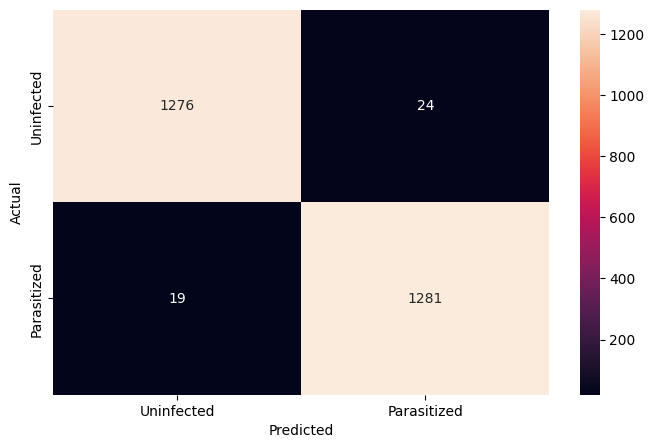

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

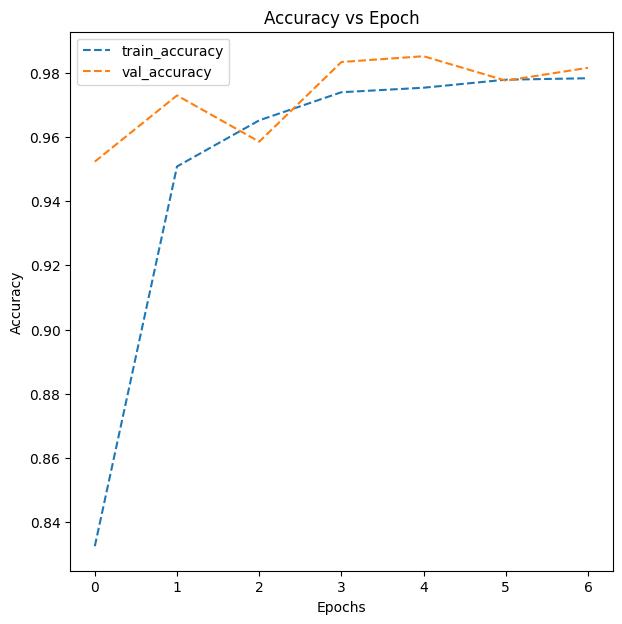

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()


model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))


model1.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Flatten())


model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.3))

# Added extra Dense layer
model1.add(Dense(256, activation="relu"))
model1.add(Dropout(0.3))

# Output
model1.add(Dense(2, activation="softmax"))

# Summary
model1.summary()









model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,570 (2.57 MB)

 Trainable params: 673,570 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,570 (2.57 MB)

 Trainable params: 673,570 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size =32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 97s 150ms/step - accuracy: 0.7792 - loss: 0.4226 - val_accuracy: 0.9848 - val_loss: 0.0597
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.9714 - loss: 0.0859 - val_accuracy: 0.9679 - val_loss: 0.0953
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 136s 146ms/step - accuracy: 0.9741 - loss: 0.0745 - val_accuracy: 0.9742 - val_loss: 0.0764


###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9872 - loss: 0.0442

 Test_Accuracy:- 0.9823076725006104


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



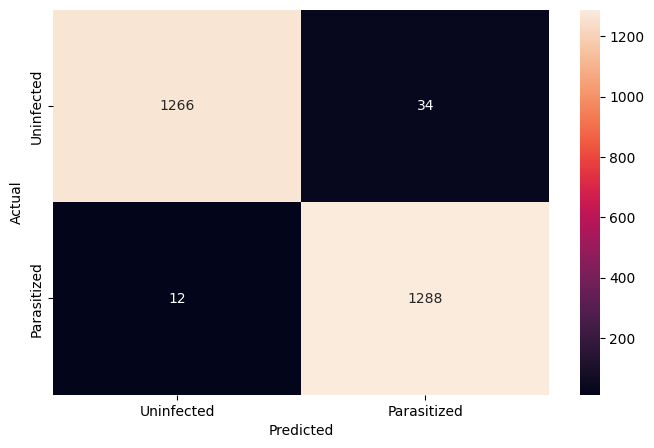

In [ ]:
pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

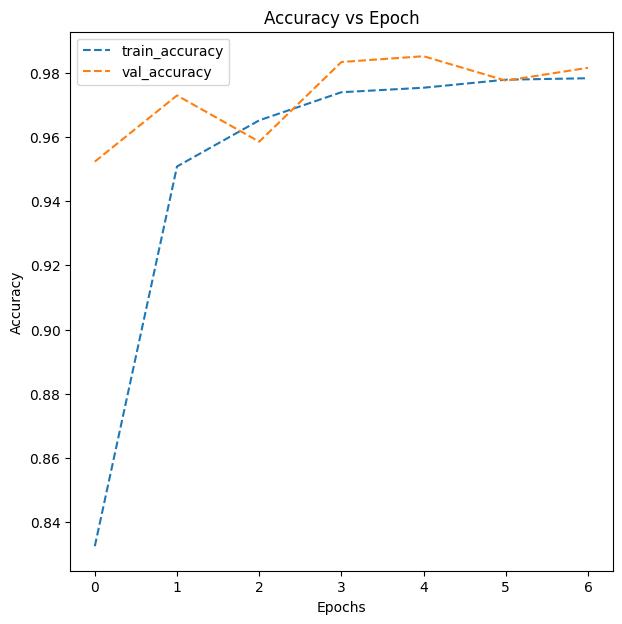

In [ ]:
plot_accuracy(history)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers



model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))

# Flatten and Fully Connected Layers
model2.add(Flatten())

model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

model2.add(Dense(2, activation='softmax'))  # For 2-class classification

# Compile the model
adam = optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,193,090 (8.37 MB)

 Trainable params: 2,192,130 (8.36 MB)

 Non-trainable params: 960 (3.75 KB)

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 289s 455ms/step - accuracy: 0.7074 - loss: 0.6276 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 327s 464ms/step - accuracy: 0.9452 - loss: 0.1506 - val_accuracy: 0.9972 - val_loss: 0.0152
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 316s 455ms/step - accuracy: 0.9643 - loss: 0.1064 - val_accuracy: 0.9968 - val_loss: 0.0151


<b>Plotting the train and validation accuracy

In [ ]:
# Plotting the accuracies
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.9315 - loss: 0.2097

 Test_Accuracy:- 0.9565384387969971


###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9315 - loss: 0.2097

 Test_Accuracy:- 0.9565384387969971


In [ ]:
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

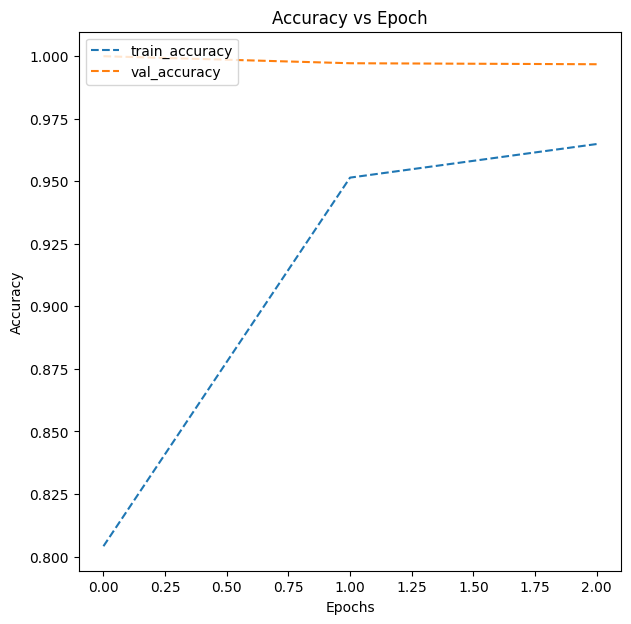

In [ ]:
plot_accuracy(history2)

####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1300
           1       0.99      0.92      0.95      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



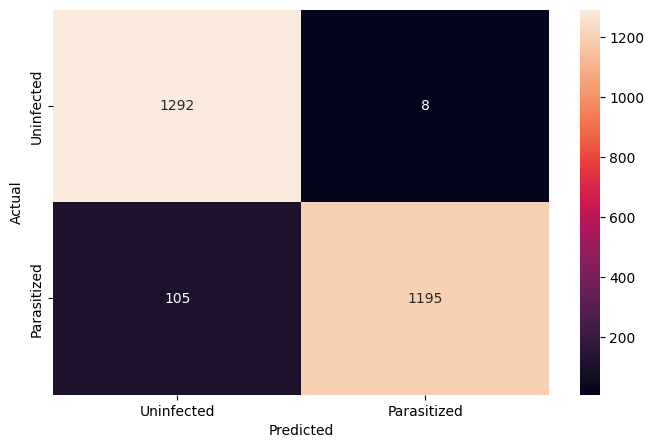

In [ ]:
pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

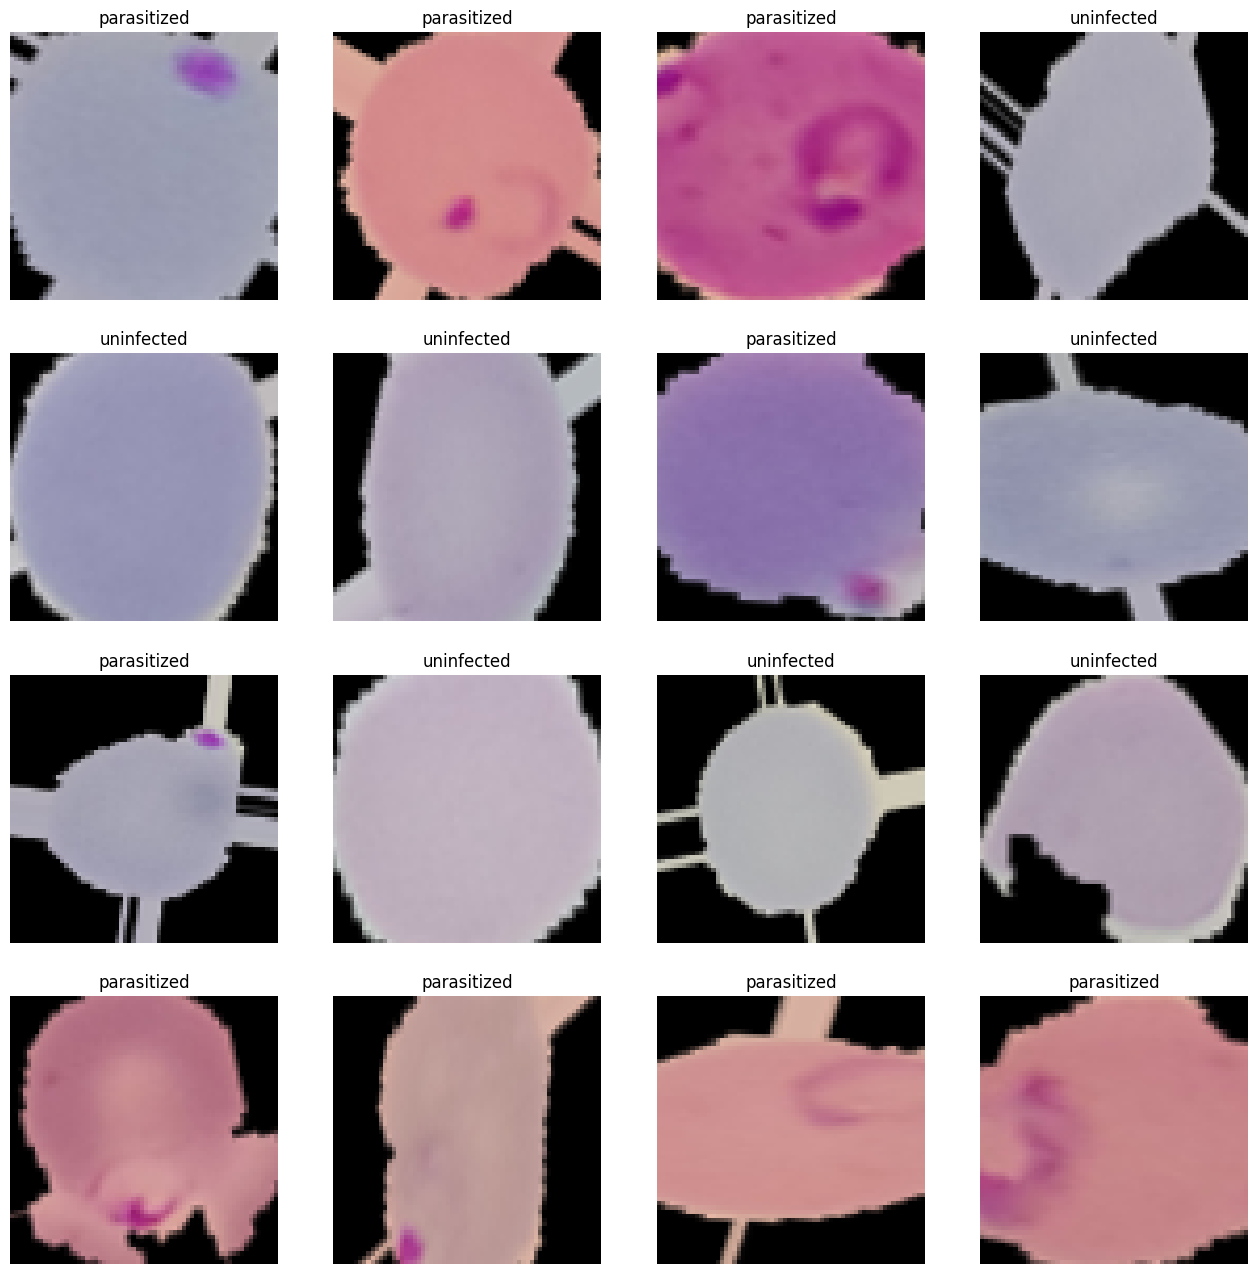

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: ____

###<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers

model3 = Sequential()

# Conv Block 1
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Conv Block 2
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

# Conv Block 3
model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

# Conv Block 4 (additional depth)
model3.add(Conv2D(256, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

# Flatten and Dense Layers
model3.add(Flatten())

model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.5))

model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.4))

# Output Layer (2-class classification)
model3.add(Dense(2, activation='softmax'))

# Compile
adam = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,04

 Total params: 2,622,914 (10.01 MB)

 Trainable params: 2,620,418 (10.00 MB)

 Non-trainable params: 2,496 (9.75 KB)

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.6487 - loss: 0.7023 - val_accuracy: 0.4926 - val_loss: 1.8153
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.9177 - loss: 0.2247 - val_accuracy: 0.9321 - val_loss: 0.2081
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.9343 - loss: 0.1825 - val_accuracy: 0.9587 - val_loss: 0.1218
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.9389 - loss: 0.1690 - val_accuracy: 0.9569 - val_loss: 0.1277
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.9437 - loss: 0.1583 - val_accuracy: 0.9585 - val_loss: 0.1275


###<B>Evaluating the model

<b>Plot the train and validation accuracy

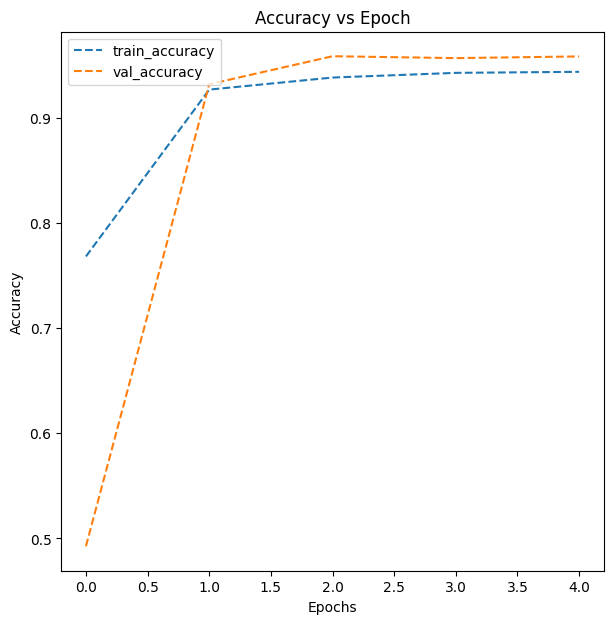

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(val_generator, steps=len(val_generator), verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.9552 - loss: 0.1287

 Test_Accuracy:- 0.9585336446762085


<B>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1300
           1       0.98      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



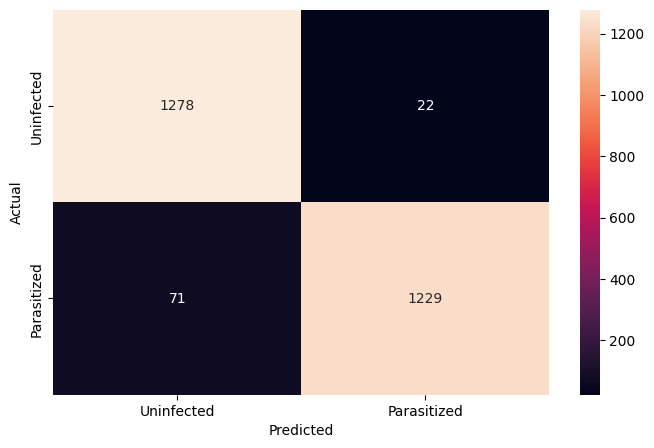

In [ ]:
#confusing matrix
pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model
from tensorflow.keras import optimizers

# Use Adam optimizer with a learning rate
adam = optimizers.Adam(learning_rate=0.0001)

# Compile the model
model4.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            X_train, y_train,
            epochs = 10,
            callbacks =[],
            batch_size = 64,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 997s 4s/step - accuracy: 0.8090 - loss: 0.4154 - val_accuracy: 0.9089 - val_loss: 0.2378
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1033s 4s/step - accuracy: 0.9239 - loss: 0.2006 - val_accuracy: 0.9492 - val_loss: 0.1473
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 993s 4s/step - accuracy: 0.9369 - loss: 0.1673 - val_accuracy: 0.9487 - val_loss: 0.1432
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1033s 4s/step - accuracy: 0.9449 - loss: 0.1540 - val_accuracy: 0.9489 - val_loss: 0.1358
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1045s 4s/step - accuracy: 0.9492 - loss: 0.1421 - val_accuracy: 0.9539 - val_loss: 0.1287
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1043s 4s/step - accuracy: 0.9513 - loss: 0.1350 - val_accuracy: 0.9544 - val_loss: 0.1247
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1035s 4s/step - accuracy: 0.9561 - loss: 0.1239 - val_accuracy: 0.9529 - val_loss: 0.1283
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 982s 4s/step - accuracy: 0.9585 - loss: 0.1174 - val

<b>Plot the train and validation accuracy

In [ ]:
# plotting the accuracies
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

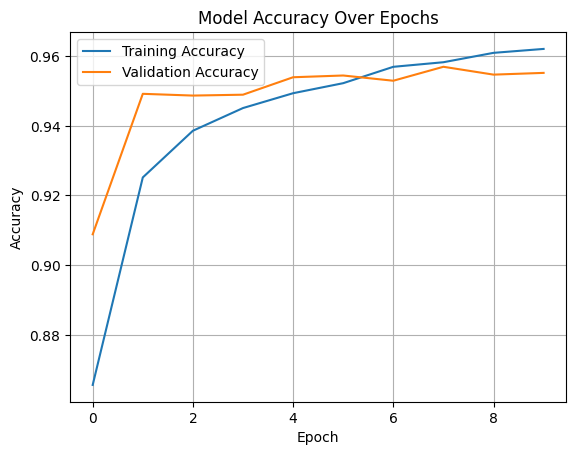

In [ ]:
plot_accuracy(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
test_loss, test_accuracy = model4.evaluate(test_images, test_labels, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9580 - loss: 0.1081
Test Accuracy: 0.9500
Test Loss: 0.1286


<b>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



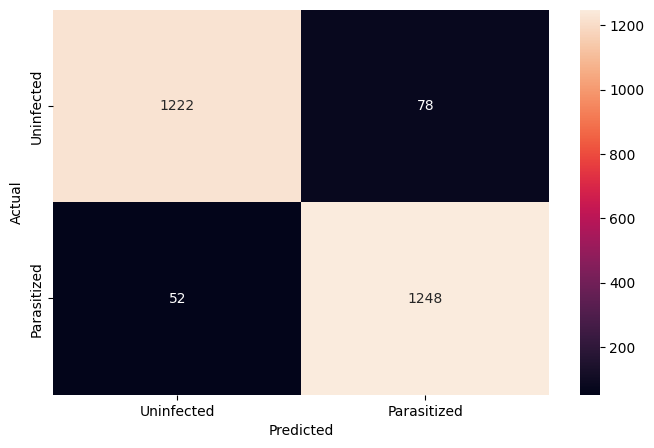

In [ ]:
pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?